# CS 3400 Machine Learning - Lab 7: Analytical and Numerical Differentiation

## Stuart Harley

### Introduction

In this lab we experiment with derivative and approximating derivatives of functions in order to find the best parameters to minimize the error of our model. We start out by examining the function for estimating a derivative and explore the effect the h term has on the accuacy of our approximations. We then perform grid searches in derivative space on a 1 parameter and 2 parameter model.

### Importing Libraries

In [1]:
from Numerical_Differentiation import NumericalDifferentiation
from test_Numerical_Differentiation import *
from cost_functions import GaussianCostFunction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Testing Implementation of Numerical Differentiation

In [2]:
!python test_Numerical_Differentiation.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


### Experiment 1: Analytical vs. Numerical Differentiation

Solving analytically for the derivative of f(x).

$$ f(x) = x^{3} - 3x^{2} - 144x + 432 $$

$$ f'(x) = 3x^{2} - 6x -144 $$

Plotting f(x) and f'(x).

In [3]:
def f(x):
    return (x ** 3) - (3 * (x ** 2)) - (144 * x) + 432

def fprime(x):
    return (3 * (x ** 2)) - (6 * x) - 144

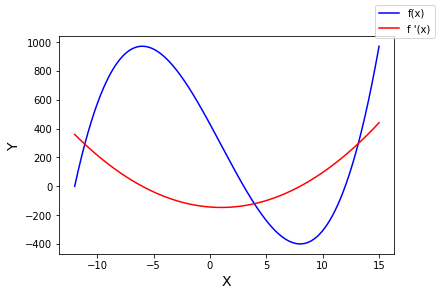

In [4]:
x = np.linspace(-12, 15, 2700) # .01 distance between all points
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b', label='f(x)')
axes.plot(x, fprime(x), c='r', label='f \'(x)')
axes.set_xlabel('X', fontsize=14)
axes.set_ylabel('Y', fontsize=14)
fig.legend();

Using the numerical method defined below, estimating the derivative of this function with different h values. Plotting the estimations against the actual derivative.

$$ f'(x) \approx \frac{f(x + h) - f(x)}{h} $$

In [5]:
def fprime_num(x, h):
    return (f(x+h) - f(x)) / h

In [6]:
h_01 = fprime_num(x, .01)
h_1 = fprime_num(x, .1)
h1 = fprime_num(x, 1)
h2 = fprime_num(x, 2)

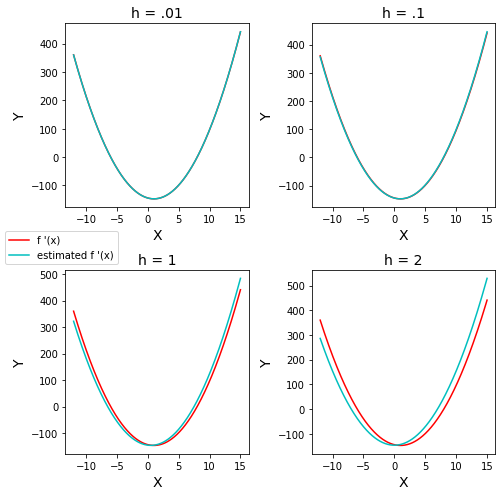

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
axes[0,0].plot(x, fprime(x), c='r', label='f \'(x)')
axes[0,1].plot(x, fprime(x), c='r')
axes[1,0].plot(x, fprime(x), c='r')
axes[1,1].plot(x, fprime(x), c='r')
axes[0,0].plot(x, h_01, c='c', label = 'estimated f \'(x)')
axes[0,1].plot(x, h_1, c='c')
axes[1,0].plot(x, h1, c='c')
axes[1,1].plot(x, h2, c='c')
axes[0,0].set_title('h = .01', fontsize=14)
axes[0,1].set_title('h = .1', fontsize=14)
axes[1,0].set_title('h = 1', fontsize=14)
axes[1,1].set_title('h = 2', fontsize=14)
axes[0,0].set_xlabel('X', fontsize=14)
axes[0,1].set_xlabel('X', fontsize=14)
axes[1,0].set_xlabel('X', fontsize=14)
axes[1,1].set_xlabel('X', fontsize=14)
axes[0,0].set_ylabel('Y', fontsize=14)
axes[0,1].set_ylabel('Y', fontsize=14)
axes[1,0].set_ylabel('Y', fontsize=14)
axes[1,1].set_ylabel('Y', fontsize=14)
fig.tight_layout()
fig.legend(loc=6);

### Experiment 2: 1-Dimensional Grid Search - Derivative Space

Using the analytical solution for f'(x), solving for values of 0 by hand.

$$ f'(x) = 3x^{2} - 6x -144 $$
$$ 0 = 3x^{2} - 6x -144 $$
$$ 0 = (3x - 24)(x + 6) $$
$$ 24 = 3x | x = -6 $$
$$ x = 8, x = -6 $$

Plotting the original function and the points found above.

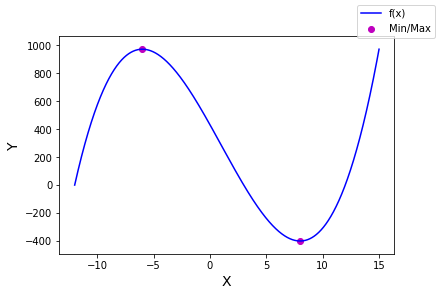

In [8]:
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b', label='f(x)')
axes.scatter(8, f(8), c='m', label='Min/Max')
axes.scatter(-6, f(-6), c = 'm')
axes.set_xlabel('X', fontsize=14)
axes.set_ylabel('Y', fontsize=14)
fig.legend();

Slicing through the vectors of the numerical approximations of f'(x) to find the points that are closest to 0.

In [9]:
low_01 = np.sort(np.argpartition(np.abs(h_01), 2)[0:2] * .01 - 12)
low_1 = np.sort(np.argpartition(np.abs(h_1), 2)[0:2] * .01 - 12)
low1 = np.sort(np.argpartition(np.abs(h1), 2)[0:2] * .01 - 12)
low2 = np.sort(np.argpartition(np.abs(h2), 2)[0:2] * .01 - 12)
print('h=.01: ' + str(low_01) + '\nh=.1: ' + str(low_1)\
      + '\nh=1: ' + str(low1) + '\nh=2: ' + str(low2))

h=.01: [-6.01  7.99]
h=.1: [-6.05  7.94]
h=1: [-6.5   7.49]
h=2: [-6.98  6.97]


Plotting these points on the original function.

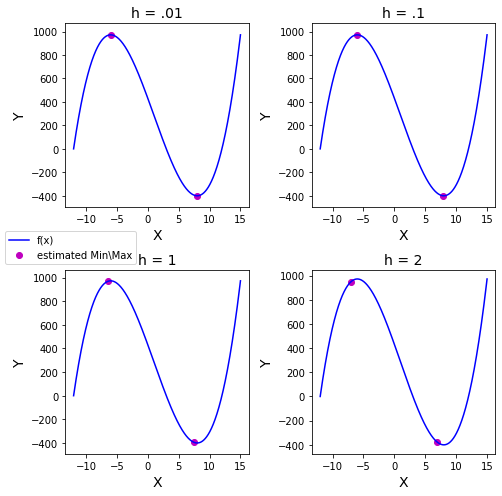

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
axes[0,0].plot(x, f(x), c='b', label='f(x)')
axes[0,1].plot(x, f(x), c='b')
axes[1,0].plot(x, f(x), c='b')
axes[1,1].plot(x, f(x), c='b')
axes[0,0].scatter(low_01, f(low_01), c='m', label = 'estimated Min\Max')
axes[0,1].scatter(low_1, f(low_1), c='m')
axes[1,0].scatter(low1, f(low1), c='m')
axes[1,1].scatter(low2, f(low2), c='m')
axes[0,0].set_title('h = .01', fontsize=14)
axes[0,1].set_title('h = .1', fontsize=14)
axes[1,0].set_title('h = 1', fontsize=14)
axes[1,1].set_title('h = 2', fontsize=14)
axes[0,0].set_xlabel('X', fontsize=14)
axes[0,1].set_xlabel('X', fontsize=14)
axes[1,0].set_xlabel('X', fontsize=14)
axes[1,1].set_xlabel('X', fontsize=14)
axes[0,0].set_ylabel('Y', fontsize=14)
axes[0,1].set_ylabel('Y', fontsize=14)
axes[1,0].set_ylabel('Y', fontsize=14)
axes[1,1].set_ylabel('Y', fontsize=14)
fig.tight_layout()
fig.legend(loc=6);

### Experiment 3: Gaussian Model Grid Search - Derivative Space

Loading in the gaussian distribution dataset.

In [11]:
gauss = np.loadtxt('gaussdist.csv', delimiter=',')
gauss_cost = GaussianCostFunction(gauss[:,0], gauss[:,1])
num_dif = NumericalDifferentiation(.00001) # delta = 1e-5

Performing a grid search over derivative space of the gaussian dataset.

In [12]:
mus = np.linspace(5, 6, 100)
sigmas = np.linspace(1, 1.75, 50)
xv, yv = np.meshgrid(mus, sigmas)
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
gradients = np.zeros(X.shape)
for i in range (X.shape[0]):
    gradients[i] = num_dif.gradient(gauss_cost, X[i])

Generating heatmaps for each of the derivative arrays

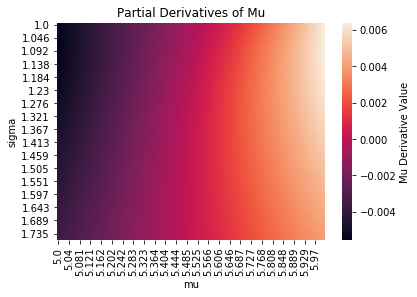

In [13]:
musd = gradients[:,0].reshape(xv.shape)
for i in range(mus.size):
    mus[i] = round(mus[i], 3)
for i in range(sigmas.size):
    sigmas[i] = round(sigmas[i], 3)
df = pd.DataFrame(data=musd, columns=mus, index=sigmas)
ax = plt.axes()
sns.heatmap(df, ax=ax, cbar_kws={'label':'Mu Derivative Value'})
plt.title('Partial Derivatives of Mu')
plt.xlabel('mu')
plt.ylabel('sigma');

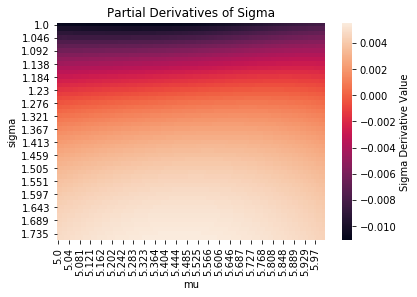

In [14]:
sigmasd = gradients[:,1].reshape(xv.shape)
df = pd.DataFrame(data=sigmasd, columns=mus, index=sigmas)
ax = plt.axes()
sns.heatmap(df, ax=ax, cbar_kws={'label':'Sigma Derivative Value'})
plt.title('Partial Derivatives of Sigma')
plt.xlabel('mu')
plt.ylabel('sigma');

Finding the locations and corresponding values in the derivative arrays that are closest to zero.

In [15]:
mu_0 = X[np.abs(musd.flatten()).argmin(), 0]
sigma_0 = X[np.abs(sigmasd.flatten()).argmin(), 1]
print('mu: ' + str(mu_0))
print('sigma: ' + str(sigma_0))

mu: 5.474747474747475
sigma: 1.2908163265306123


Using the cost_predict method with the found parameter values to get the model output. Plotting the dataset and model output.

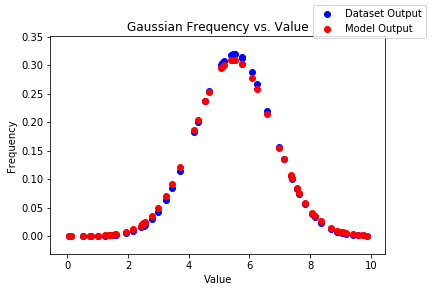

In [16]:
output = gauss_cost.predict(gauss[:,0], np.asarray([mu_0, sigma_0]))
fig, axes = plt.subplots()
axes.scatter(gauss[:,0], gauss[:,1], color='b', label='Dataset Output')
axes.scatter(gauss[:,0], output, color='r', label='Model Output')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value')
fig.legend();

### Reflection Questions

For experiment 1, how did your approximated derivatives (numerical solutions) compare to the analytical solution. Describe what effect the h term had on the accuracy of the approximation. Discuss considerations/tradeoffs when picking an optimal h value.

- The smaller the h value of the approximated derivative, the closer it was to the actual derivative value. The smaller the h value, the more expensive the computation will be. Also, at some point the h value may be too small to be represented by a float. However, if your h value is too large the model's accuracy will suffer.

In experiment 2 you should have found both local extrema of the function. Describe what information the derivative provides and how you found these extrema. If each numerical approximation of the derivative didn’t always lead to both extrema of the function, explain why.

- I found the extrema by finding the values closest to zero of the approximated derivative. This is because the derivative gives you the slope of the line at each point, and a point of extrema has a slope of zero. The values that I got were only as good as the approximation function gave, so the larger the h value, the more inaccurate the extrema values were.

Be creative - brainstorm a way that you could leverage the information of the derivative to only find the minima, not all extrema.

- You could simply find all the points where the derivative is zero and then look at the points directly to the right and left. If the value on the left is not negative and the value on the right is not positive, then it is not a minima.

For experiment 3, you performed another grid search. Compare and contrast what features you were looking for in the error-space grid search (lab 06) and the derivative-space grid search. Make sure to compare the computational complexity between these spaces. Depending on your answer do you think it makes more sense to perform a grid search in error space or derivative space?

- For the grid search in this lab I was looking at the values of the estimated derivative of the cost function at each point in the feature space. Last lab I was calculating the actual cost function of each point in the feature space. The gradient method to do this actually uses the same underlying cost function once for each parameter of each point (twice per point for gaussian), so it is more computationally expensive to run than just calculating the cost of each point. Therefore, it makes more sense to perform a grid search in error space than derivative space.

Be even more creative – brainstorm a way (or algorithm) that you could use to leverage the gradient, without having to use a grid search method.

- Instead of doing a grid search of gradients, you can just calculate the derivative at one point, then look at the returned value. If it is negative, you move "right" in parameter space or "left" if it is positive. Then you calculate again. You continue to "follow the gradient" until you end up finding a minima. This way you have to calculate the gradient at much fewer points so it is much less computationally expensive, and it is faster.